# This is homework 5 of Machine Learning
### Decision Trees as Interpretable Models
### The LASSO and Boosting for Regression
#### William Lu
#### 7424831487
#### WilliamLu1999

In [1]:
### set up and download
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import glob
import os
import math

##### 1. (a)(b) Read. Build a decision tree on the whole dataset and plot it.

In [2]:
df_diagnosis = pd.read_csv('../data/diagnosis.data', encoding='utf-16', sep='\t', names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Bladder','Pelvis'], header=None)
df_diagnosis=df_diagnosis.replace('\,','.',regex=True)
df_diagnosis

,Temperature,Nausea,Lumbar,Urine,Micturition,Urethra,Bladder,Pelvis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [3]:
# label encoding multiple selected columns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Nausea','Lumbar','Urine','Micturition','Urethra','Bladder','Pelvis']
df_diagnosis[cols] = df_diagnosis[cols].apply(le.fit_transform)
df_diagnosis

,Temperature,Nausea,Lumbar,Urine,Micturition,Urethra,Bladder,Pelvis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


Plot the decision tree. 0 means no. 1 means yes.

[Text(0.4, 0.9, 'X[0] <= 37.95\nentropy = 0.99\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'X[2] <= 0.5\nentropy = 0.459\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\nentropy = 0.775\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'X[4] <= 0.5\nentropy = 0.479\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\nentropy = 0.465\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

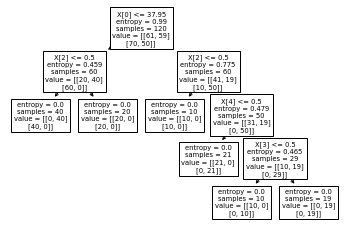

In [4]:
from sklearn.metrics import accuracy_score
dt = tree.DecisionTreeClassifier(criterion='entropy')
X = df_diagnosis[['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra']]
y = df_diagnosis[['Bladder','Pelvis']]
dt.fit(X,y)
tree.plot_tree(dt)

##### 1.(c) Convert the decision rules into a set of IF-THEN rules.

In [5]:
# reference: https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
def tree_to_pseudo(tree, feature_names):
	"""
	Outputs a decision tree model as if/then pseudocode
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as pseudocode
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	left = tree.tree_.children_left
	right = tree.tree_.children_right
	threshold = tree.tree_.threshold
	features = [feature_names[i] for i in tree.tree_.feature]
	value = tree.tree_.value

	def recurse(left, right, threshold, features, node, depth=0):
		indent = "  " * depth
		if (threshold[node] != -2):
			print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
			if left[node] != -1:
				recurse (left, right, threshold, features, left[node], depth+1)
				print(indent,"} else {")
				if right[node] != -1:
					recurse (left, right, threshold, features, right[node], depth+1)
				print(indent,"}")
		else:
			print(indent,"return " + str(value[node]))

	recurse(left, right, threshold, features, 0)

In [6]:
features =['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Bladder','Pelvis']
tree_to_pseudo(dt, features)

 if ( Temperature <= 37.95000076293945 ) {
   if ( Lumbar <= 0.5 ) {
     return [[ 0. 40.]
 [40.  0.]]
   } else {
     return [[20.  0.]
 [20.  0.]]
   }
 } else {
   if ( Lumbar <= 0.5 ) {
     return [[10.  0.]
 [10.  0.]]
   } else {
     if ( Micturition <= 0.5 ) {
       return [[21.  0.]
 [ 0. 21.]]
     } else {
       if ( Urine <= 0.5 ) {
         return [[10.  0.]
 [ 0. 10.]]
       } else {
         return [[ 0. 19.]
 [ 0. 19.]]
       }
     }
   }
 }


##### 1(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
#clf = GridSearchCV(dt, features, cv=5)
path = dt.cost_complexity_pruning_path(X, y)
path

{'ccp_alphas': array([0.        , 0.09979604, 0.18809344, 0.22957396, 0.3725747 ]),
 'impurities': array([0.        , 0.19959209, 0.38768553, 0.61725948, 0.98983419])}

In [9]:
path['ccp_alphas'][1]

0.0997960439819062

In [10]:
tree_para = {'criterion':['gini','entropy']}
clf = GridSearchCV(dt, tree_para, cv=5)
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_params_)
bestClassTree = clf.best_estimator_

0.95
{'criterion': 'gini'}


[Text(0.6, 0.8333333333333334, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.4, 0.5, 'X[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.8, 0.5, 'gini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]')]

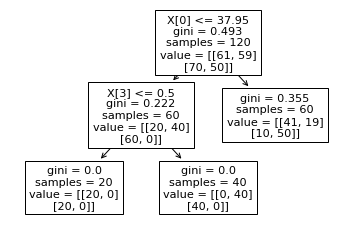

In [11]:
# tuning the parameters
# reference: https://vzhang1999.medium.com/classification-tree-growing-and-pruning-with-python-code-grid-search-cost-complexity-function-b2e45e33a1a4
dt2 = tree.DecisionTreeClassifier(ccp_alpha = 0.09979604,criterion='gini',random_state=0)
dt2.fit(X, y)
tree.plot_tree(dt2)

##### The LASSO and Boosting for Regression

##### 2 (a) Split the dataset into training and testing (b) Data imputation 

In [12]:
df_communities = pd.read_csv('../data/communities.data', header=None)
df_communities

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [13]:
df_sub_c = df_communities.iloc[:,df_communities.columns != 3]
df_sub_c

,0,1,2,4,5,6,7,8,9,10,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,10,0.01,0.40,0.10,0.87,0.12,0.16,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,10,0.05,0.96,0.46,0.28,0.83,0.32,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,10,0.16,0.37,0.25,0.69,0.04,0.25,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,10,0.08,0.51,0.06,0.87,0.22,0.10,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [14]:
# using SimpleImputer to fill empty values as mean of that column
from sklearn.impute import SimpleImputer
df_communities = df_communities.replace('?', np.nan)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_communities.iloc[:,1:3]=imp.fit_transform(df_communities.iloc[:,1:3].values)
df_communities.iloc[:,4:128]=imp.fit_transform(df_communities.iloc[:,4:128].values)
df_communities=df_communities.drop(columns=[0,1,2,3,4],axis=1)

In [15]:
# dropping the first 5 feartures that are not predictive according to the communities.name file
#df_communities=df_communities.drop(columns=[0,1,2,3,4],axis=1)
df_communities.columns = df_communities.columns.map(str)
df_communities # now column names are in string format

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


In [16]:
training_communities=df_communities.iloc[0:1495,::]
testing_communities=df_communities.iloc[1495::,::]
training_communities

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


##### 2(c) Correlation of features in the dataset

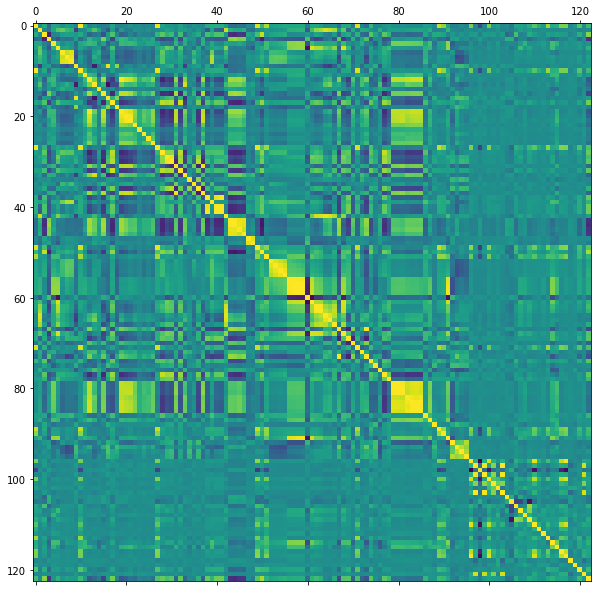

In [17]:
corr = df_communities.corr() 
plt.figure(figsize=(10,10))
plt.matshow(corr,fignum=1)
plt.show()

##### 2(d) Coefficient of Variation CV for each feature

In [18]:
std=list(df_communities.std())

In [19]:
mean=list(df_communities.mean())

In [20]:
CV = [s/m for s,m in zip(std, mean)]
CV

[2.203502536390972,
 0.3532983018683109,
 1.4109203963756864,
 0.3237815624993411,
 1.3591621938222074,
 1.614277791710685,
 0.36583986883972397,
 0.29069288841904145,
 0.4951605143654288,
 0.42344170889026195,
 2.0017436381957676,
 0.6388488712113656,
 0.5797533935755996,
 0.3277100586060616,
 0.7000301156104908,
 0.35923994722340613,
 0.36851263032540155,
 0.699030504203365,
 0.3496390828575848,
 0.527731885342079,
 0.545633428419145,
 0.5075521907214038,
 0.5894690036844645,
 0.8096850868666168,
 0.6061938508790911,
 0.6706445725467309,
 0.4739597186074789,
 2.304969714852185,
 0.7539801744357952,
 0.6756002166771716,
 0.5282862664983298,
 0.5784008385663657,
 0.5561327984953394,
 0.3473272454905018,
 0.5105803413512793,
 0.39822567574896933,
 0.5084613109923771,
 0.42210585589961375,
 0.3955833690023806,
 0.40381161614997696,
 0.3592727036887422,
 0.37146815336205474,
 0.31695474768257587,
 0.3306111369901614,
 0.3324758807131056,
 0.3294258419264571,
 0.32855094726896933,
 0.33624

##### 2(e) Plots for Coefficient of Variation CV for each feature

In [21]:
import heapq
num = int(128**(1/2))
feature_index=heapq.nlargest(11, range(len(CV)), CV.__getitem__)
#CV_chosen = CV[-11:] # choose #sqrt128 number of features with the highest CV score
#CV_chosen
feature_index # this is the list of index that has the largest CV score in the CV score list

[90, 89, 49, 51, 120, 27, 0, 10, 71, 113, 5]

In [22]:
column_name_list = [str(x+5) for x in feature_index]
# we add 5 because feature_index are the index number of 11 highest number in the CV score list
# but we want to get the column name, not index, for the pairplot, the new dataframe's
# first column starts with name 5, which is at index 0.
selected_df_communities= df_communities[column_name_list]
selected_df_communities
# select only these above columns
#CV_data = training_communities[[5,113]]
#CV_data
#pairs = sns.pairplot(training_communities,vars=[],hue='binary_label')
#pairs.fig.suptitle('Relationship Between Mean, Median, and Standard Deviation of 1,2,6 Time Series',y=1.05)

,95,94,54,56,125,32,5,15,76,118,10
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.01,0.16
1990,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.02,0.32
1991,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.08,0.25
1992,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.03,0.10


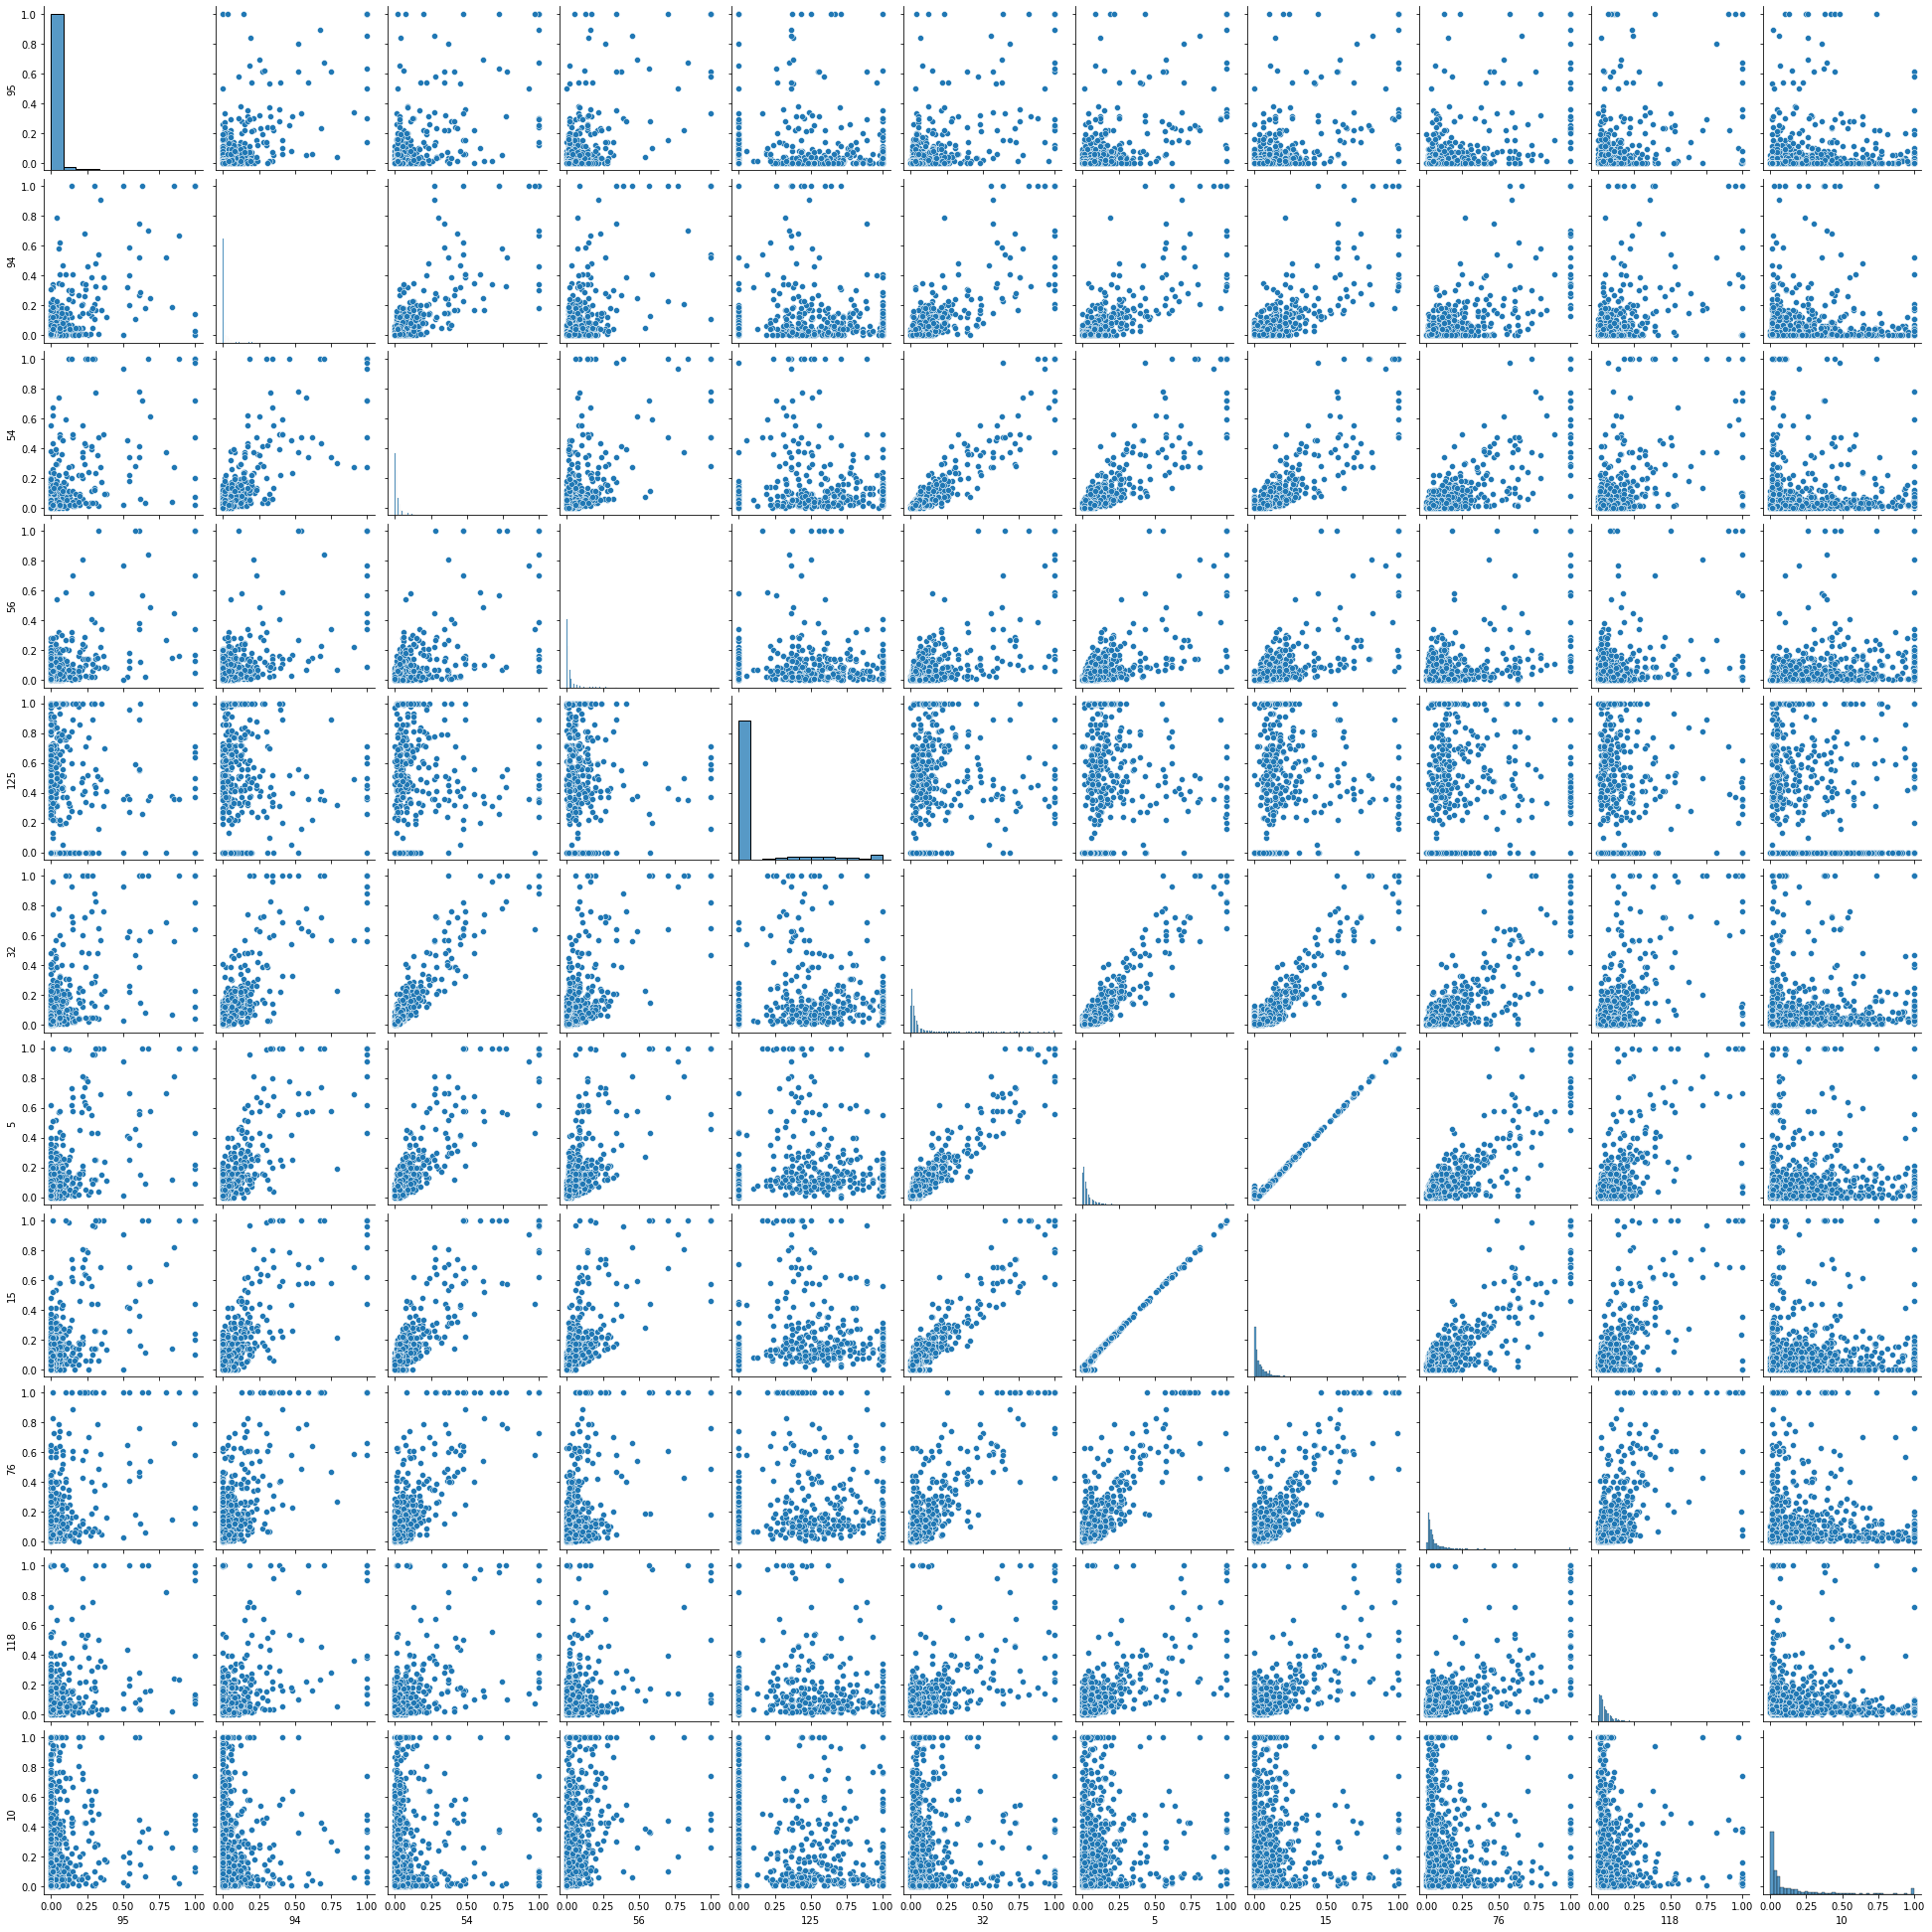

In [24]:
# creating a pairplot for each column
sns.pairplot(selected_df_communities)

By looking at these scatter plots, we can see the strengths of relationships between some of the 11 selected features are quite siginificant.

Text(0.5, 0, 'Column Names')

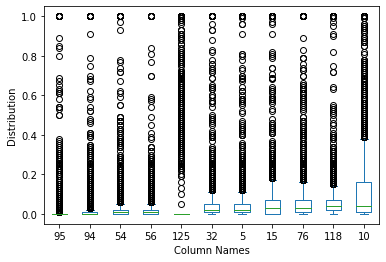

In [25]:
# creating boxplots for each column now
bplot = selected_df_communities.plot(kind='box')
bplot.set_ylabel('Distribution')
bplot.set_xlabel('Column Names')

##### 2(f) Fit a linear model using least squares to the training set and report the test error

In [67]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
X_train = training_communities.iloc[::,0:-1]
y_train = training_communities.iloc[::,-1]
X_test = testing_communities.iloc[::,0:-1]
y_test = testing_communities.iloc[::,-1]

In [68]:
lnr = linear_model.LinearRegression()
lnr.fit(X_train,y_train)

LinearRegression()

In [69]:
y_lnr_pred = lnr.predict(X_test)
test_error_lnr = mean_squared_error(y_test,y_lnr_pred)
print('The test error for least square linear regression is ',test_error_lnr)

The test error for least square linear regression is  0.7897255274315268


##### 2(g) Fit a ridge regression on the training set, with lambda chosen by cross-validation. Report the test error.

In [29]:
# reference: https://www.statology.org/ridge-regression-in-python/
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [30]:
# use cross validation to determine models
cv_ridge = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# define model. lambda is alphas here.
model_ridge = RidgeCV(alphas=np.arange(0.1, 10, 0.1), cv=cv_ridge, scoring='neg_mean_absolute_error')
# fit model
model_ridge.fit(X_train,y_train)
#display lambda that produced the lowest test MSE
print('So lambda is ',model_ridge.alpha_)

So lambda is  6.7


In [31]:
y_pred_ridge = model_ridge.predict(X_test)
test_error_ridge = mean_squared_error(y_test,y_pred_ridge)
print('The test error for ridge regression and a lambda of 6.7 is ',test_error_ridge)

The test error for ridge regression and a lambda of 6.7 is  0.017471474282229463


##### 2(h) Fit a LASSO model on the training set, with lambda chosen by cross-validation. Report the test error, a list of variables.

In [32]:
from sklearn.linear_model import LassoCV

In [33]:
# use cross validation to determine models
cv_lasso = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# define model. lambda is alphas here.
model_lasso = LassoCV(alphas=np.arange(0.1, 10, 0.1), cv=cv_lasso, n_jobs=-1)
# fit model
model_lasso.fit(X_train,y_train)
#display lambda that produced the lowest test MSE
print('So lambda is ',model_lasso.alpha_)

So lambda is  9.9


In [34]:
y_pred_lasso = model_lasso.predict(X_test)
test_error_lasso = mean_squared_error(y_test,y_pred_lasso)
print('The test error for lasso regression and a lambda of 9.9 is ',test_error_lasso)

The test error for lasso regression and a lambda of 9.9 is  0.04766572905357029


In [35]:
np.abs(model_lasso.coef_)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [36]:
print('The list of variables selected by Lasso regression and with a lambda of 9.9 is',model_lasso.n_features_in_)

The list of variables selected by Lasso regression and with a lambda of 9.9 is 122


Standardize the data and pass in LASSO again.

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_X_train = scaler.fit_transform(X_train)
standardized_X_test = scaler.fit_transform(X_test)

In [38]:
cv_lasso_std = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# define model. lambda is alphas here.
model_lasso_std = LassoCV(alphas=np.arange(0.1, 10, 0.1), cv=cv_lasso_std, n_jobs=-1)
# fit model
model_lasso_std.fit(standardized_X_train,y_train)
#display lambda that produced the lowest test MSE
print('So lambda is ',model_lasso_std.alpha_)

So lambda is  0.1


In [39]:
y_pred_lasso_std = model_lasso_std.predict(standardized_X_test)
test_error_lasso_std = mean_squared_error(y_test,y_pred_lasso_std)
print('The test error for lasso regression and a lambda of 0.1 is ',test_error_lasso_std)

The test error for lasso regression and a lambda of 0.1 is  0.02773577293208033


In [40]:
np.abs(model_lasso_std.coef_)

array([0.        , 0.        , 0.        , 0.00702116, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04023129,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0355491 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Feature 8, 49, and 55 are selected during this lasso regression run when we standardize the data.

The test error is smaller if we standardize the data.

##### 2(i) Fit a PCR model on the training set, with M (the number of components) chosen by cross-validation. Report the test error.

In [105]:
# reference : https://towardsdatascience.com/principal-component-regression-clearly-explained-and-implemented-608471530a2f
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 

In [107]:
# ensure no predictor is overly influential in the model
regr = LinearRegression()
cv_pca = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
rmse = []
pca = PCA()
X_reduced_train = pca.fit_transform(scale(X_train))#each predictor should be scaled to have a mean of 0 and std of 1
#pca.fit(X_reduced)
n = len(X_reduced_train)
for i in range(1, X_reduced_train.shape[1]+1):
    rmse_score = -1 * cross_val_score(regr, 
                                      X_reduced_train[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv_pca, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse.append(rmse_score)

In [119]:
rmse.index(min(rmse))-1 # component number

91

In [118]:
# now use the best component number 91
best_pc_num =91
mse_=[]
#X_reduced_train = pca.fit_transform(X_train)#each predictor should be scaled to have a mean of 0 and std of 1
#pca.fit(X_reduced)
lin_reg_pc = regr.fit(X_reduced_train[:,:best_pc_num], y_train)# train the model
X_test_pc = pca.transform(scale(X_test))[:,:best_pc_num]
# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)
pcr_score_test

12.49684564954448

##### 2(j) Fit a boosting tree, with alpha chosen by cross-validation. Report the test error.

In [84]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import cv

In [91]:
from sklearn.preprocessing import LabelEncoder
# instantiate the classifier 
xgb_model = XGBRegressor()
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [88]:
test_params = {'alpha':[z for z in range(1,100)]}
model_xgb = GridSearchCV(estimator = xgb_model,param_grid = test_params)
model_xgb.fit(X_train,y_train)
print(model_xgb.best_params_)

{'alpha': 64}


In [93]:
y_pred_xgb = model_xgb.predict(X_test)
test_error_xgb = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
print('The test error for L1-penalized gradient boosting regression and a alpha of 64 is ',test_error_xgb)


The test error for L1-penalized gradient boosting regression and a alpha of 64 is  12.15036292756234
